# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

df = pd.read_csv(data_path)

In [2]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh,Rainfall
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429,1.0
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857,41.5
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000,24.0
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000,0.0
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286,0.0


In [3]:
import matplotlib.pyplot as plt #描画用ライブラリ

In [4]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [5]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

In [6]:
columns = ["Flucases","Tempave", "Rh", "Holiday", "Rainfall"]

all_data = df_tokyo[columns]

In [7]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [8]:
train_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
12480,818,9.528571,50.571429,2,1.0
12481,1167,8.642857,61.142857,3,41.5
12482,2562,6.828571,56.000000,2,24.0
12483,3781,5.342857,42.000000,2,0.0
12484,3903,7.214286,38.714286,2,0.0


In [9]:
test_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
13260,3809,5.357143,47.142857,3,6.5
13261,9892,6.285714,38.285714,2,35.5
13262,8198,5.628571,53.857143,3,19.0
13263,9625,6.771429,63.714286,2,31.5
13264,7844,4.228571,49.000000,2,9.0


trainとtestのdfを作る

In [10]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh", "Rainfall"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh", "Rainfall"]]
test_xs_df = test_df["Holiday"]

# Dataset and DataLoader

In [11]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [12]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
data_dir = "datasets/infuluenza/vecLSTMx2/"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

In [13]:
seq_length = 26

train_Xs = np.load(data_dir + "train_Xs_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_ys_" + str(seq_length) + "w.npy")
val_Xs = np.load(data_dir + "val_Xs_" + str(seq_length) + "w.npy")
val_ys = np.load(data_dir + "val_ys_" + str(seq_length) + "w.npy")

In [14]:
trn_xs_tensor = torch.Tensor(train_Xs)
trn_ys_tensor = torch.Tensor(train_ys)

val_xs_tensor = torch.Tensor(val_Xs)
val_ys_tensor = torch.Tensor(val_ys)

In [15]:
train_Xs.shape, train_ys.shape, val_Xs.shape, val_ys.shape

((603, 26, 5), (603, 1, 5), (151, 26, 5), (151, 1, 5))

In [16]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(exp_dir + 'std_scaler.joblib')

In [17]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [18]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
1 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
2 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
3 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
4 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
5 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
6 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
7 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
8 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
9 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
10 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
11 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
12 torch.Size([3, 26, 5]) torch.Size([3, 1, 5])


In [19]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
1 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
2 torch.Size([50, 26, 5]) torch.Size([50, 1, 5])
3 torch.Size([1, 26, 5]) torch.Size([1, 1, 5])


# LSTM model

In [20]:
class cLSTM(nn.Module):
    def __init__(self, input_size = 4, hidden_size=32, cond_size = 1, output_size=4, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.cond_size = cond_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.cfc1 = nn.Linear(self.cond_size, int(self.hidden_size / 2))
        self.cfc2 = nn.Linear(int(self.hidden_size / 2), int(self.hidden_size / 4))
        
        self.fc1 = nn.Linear(int(self.hidden_size / 4) + self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x, cin):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
        
        ch1 = self.relu(self.cfc1(cin))
        ch2 = self.cfc2(ch1)
        
        h_list = [outs, ch2]
        h1 = torch.cat(h_list, dim=1)
        h2 = self.relu(self.fc1(h1))
        h3 = self.fc2(h2)
        
        y_list = [self.relu(h3[:,0:1]), h3[:,1:3], self.relu(h3[:,3:4])]
        ys = torch.cat(y_list, dim=1)

        return ys

In [21]:
model = cLSTM(input_size = 5, hidden_size = 32, cond_size = 1, output_size = 4, num_layers = 1)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [22]:
batch_0x = list(trn_loader)[0][0]
batch_0c = list(trn_loader)[0][1]

In [23]:
batch_0x.shape, batch_0c.shape

(torch.Size([50, 26, 5]), torch.Size([50, 1, 5]))

In [24]:
batch_0c = torch.reshape(batch_0c[:,:,-1], (batch_0c.shape[0], 1))

In [25]:
batch_0c.shape

torch.Size([50, 1])

In [26]:
preds = model(batch_0x, batch_0c)

In [27]:
preds.shape

torch.Size([50, 4])

## Train

In [28]:
model.cuda()

cLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(5, 32, dropout=0.2)
  (cfc1): Linear(in_features=1, out_features=16, bias=True)
  (cfc2): Linear(in_features=16, out_features=8, bias=True)
  (fc1): Linear(in_features=40, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [29]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [30]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()
                input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))

            preds = model(inputs, input_c)
            true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [31]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        optimizer.zero_grad()
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.9797197167689984 Val loss:  0.6541316371876746
epoch:  1 Train loss:  0.9094355427301847 Val loss:  0.6027088086120784
epoch:  2 Train loss:  0.8117457582400396 Val loss:  0.5166694642975926
epoch:  3 Train loss:  0.710790739609645 Val loss:  0.3990424107760191
epoch:  4 Train loss:  0.5584445641590998 Val loss:  0.33872095914557576
epoch:  5 Train loss:  0.5145311060433204 Val loss:  0.3257611058652401
epoch:  6 Train loss:  0.5019734089191144 Val loss:  0.3058606617851183
epoch:  7 Train loss:  0.6789066883233877 Val loss:  0.2891498295357451
epoch:  8 Train loss:  0.6490516479198749 Val loss:  0.23658341413829476
epoch:  9 Train loss:  0.3878939105914189 Val loss:  0.22639093454927206
epoch:  10 Train loss:  0.3546143861917349 Val loss:  0.19322481844574213
epoch:  11 Train loss:  0.3331968222673123 Val loss:  0.19224547687917948
epoch:  12 Train loss:  0.33370900727235353 Val loss:  0.18264261353760958
epoch:  13 Train loss:  0.36770711036828846 Val loss:  

epoch:  116 Train loss:  0.2896839345876987 Val loss:  0.1885738242417574
epoch:  117 Train loss:  0.286887584397426 Val loss:  0.1907617561519146
epoch:  118 Train loss:  0.3241609873679968 Val loss:  0.18530991673469543
epoch:  119 Train loss:  0.30110553250863004 Val loss:  0.19217477180063725
epoch:  120 Train loss:  0.28511209098192364 Val loss:  0.19558155164122581
epoch:  121 Train loss:  0.28943422322089857 Val loss:  0.18929637968540192
epoch:  122 Train loss:  0.28793623126470125 Val loss:  0.18165362626314163
epoch:  123 Train loss:  0.2975499698748955 Val loss:  0.1883799023926258
epoch:  124 Train loss:  0.29070901297605956 Val loss:  0.18205459602177143
epoch:  125 Train loss:  0.2895016246117078 Val loss:  0.18207124434411526
epoch:  126 Train loss:  0.2912348279586205 Val loss:  0.18454156443476677
epoch:  127 Train loss:  0.2909156737419275 Val loss:  0.1819603480398655
epoch:  128 Train loss:  0.29386991835557497 Val loss:  0.18571775779128075
epoch:  129 Train loss: 

epoch:  228 Train loss:  0.28899604884477764 Val loss:  0.1935305166989565
epoch:  229 Train loss:  0.282264769077301 Val loss:  0.1836152896285057
epoch:  230 Train loss:  0.2968152085175881 Val loss:  0.1934753805398941
epoch:  231 Train loss:  0.29191328241274905 Val loss:  0.19025291875004768
epoch:  232 Train loss:  0.2868459878059534 Val loss:  0.19636868312954903
epoch:  233 Train loss:  0.2710120569054897 Val loss:  0.18096691370010376
epoch:  234 Train loss:  0.27742869464250713 Val loss:  0.1821796726435423
epoch:  235 Train loss:  0.27964355051517487 Val loss:  0.17592171020805836
epoch:  236 Train loss:  0.28179213863152724 Val loss:  0.18133188039064407
epoch:  237 Train loss:  0.3058172624844771 Val loss:  0.18181783892214298
epoch:  238 Train loss:  0.28416425448197585 Val loss:  0.19030124135315418
epoch:  239 Train loss:  0.2826830939604686 Val loss:  0.18833819963037968
epoch:  240 Train loss:  0.27483055224785435 Val loss:  0.1810372807085514
epoch:  241 Train loss: 

epoch:  340 Train loss:  0.27220578491687775 Val loss:  0.18357443623244762
epoch:  341 Train loss:  0.2590115013030859 Val loss:  0.17664160765707493
epoch:  342 Train loss:  0.26323631749703336 Val loss:  0.1824564579874277
epoch:  343 Train loss:  0.2639851455505078 Val loss:  0.17957423254847527
epoch:  344 Train loss:  0.394354169185345 Val loss:  0.19792197085916996
epoch:  345 Train loss:  0.28466805815696716 Val loss:  0.1834597708657384
epoch:  346 Train loss:  0.2668561316453494 Val loss:  0.18469776585698128
epoch:  347 Train loss:  0.25773198501421857 Val loss:  0.1797407353296876
epoch:  348 Train loss:  0.26409690311321843 Val loss:  0.17922496516257524
epoch:  349 Train loss:  0.26556869596242905 Val loss:  0.18907656893134117
epoch:  350 Train loss:  0.26185850913708025 Val loss:  0.18047764617949724
epoch:  351 Train loss:  0.26901307243567246 Val loss:  0.18484384566545486
epoch:  352 Train loss:  0.28779126015993267 Val loss:  0.18278546072542667
epoch:  353 Train lo

epoch:  452 Train loss:  0.2497344590150393 Val loss:  0.18472225405275822
epoch:  453 Train loss:  0.25759551387566787 Val loss:  0.18237393721938133
epoch:  454 Train loss:  0.24977187697704023 Val loss:  0.17973268683999777
epoch:  455 Train loss:  0.24951490129415804 Val loss:  0.18771541118621826
epoch:  456 Train loss:  0.24096185742662504 Val loss:  0.18171458644792438
epoch:  457 Train loss:  0.245830516402538 Val loss:  0.18522205483168364
epoch:  458 Train loss:  0.24736629655727974 Val loss:  0.18441922217607498
epoch:  459 Train loss:  0.25910023657175213 Val loss:  0.18423457071185112
epoch:  460 Train loss:  0.24414646510894483 Val loss:  0.1822476089000702
epoch:  461 Train loss:  0.2500585810496257 Val loss:  0.1835481310263276
epoch:  462 Train loss:  0.2449753972200247 Val loss:  0.18693375121802092
epoch:  463 Train loss:  0.274636637706023 Val loss:  0.18713603727519512
epoch:  464 Train loss:  0.27537891841851747 Val loss:  0.18710096552968025
epoch:  465 Train los

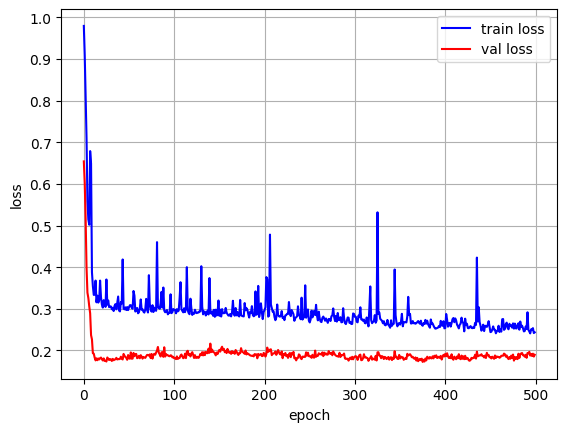

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [33]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(375, 0.1721961898729205)

In [22]:
save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"

model = torch.load(save_model_path)

### Scatter plot

In [23]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [24]:
np.array(trues_list).shape, np.array(preds_list).shape

((603, 1, 4), (603, 1, 4))

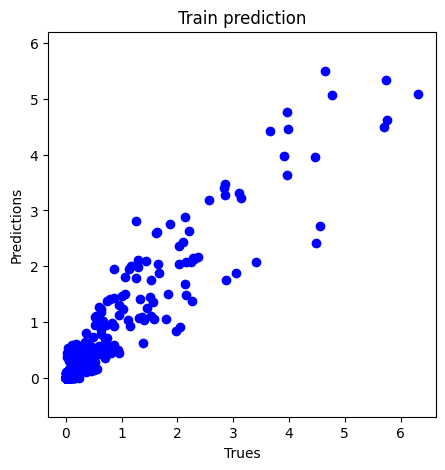

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする
plt.show()

In [26]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


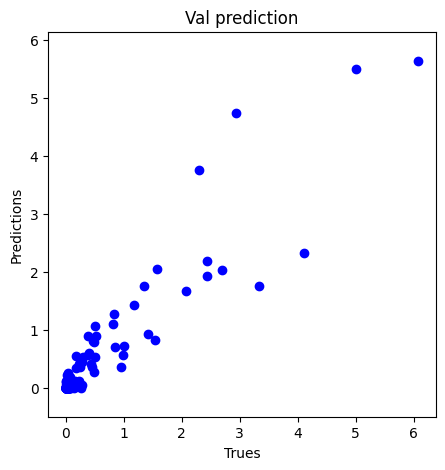

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする

plt.show()

## Test prediction

In [28]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(exp_dir + "train_np.npy")
test_np = np.load(exp_dir + "test_np.npy")

In [29]:
train_np.shape, test_np.shape

((780, 5), (260, 5))

In [30]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(data_dir + 'std_scaler.joblib')

In [31]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

In [32]:
test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [33]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 500

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 10

test_scaled_zs = (np.array(test_np[:,3]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [34]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
test_scaled_ys.shape, test_scaled_zs.reshape(-1,1).shape, test_scaled_ts.reshape(-1,1).shape, test_np.shape

((260, 2), (260, 1), (260, 1), (260, 5))

In [36]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_scaled_zs.reshape(-1,1), test_np[:,-1].reshape(-1,1)], axis = 1)

In [37]:
test_all_np.shape

(260, 5)

### 1. Prediction based on results from 40 days ago

In [38]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [39]:
test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [40]:
tst_xs_tensor = torch.Tensor(test_Xs)
tst_ys_tensor = torch.Tensor(test_ys)

In [41]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [42]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233


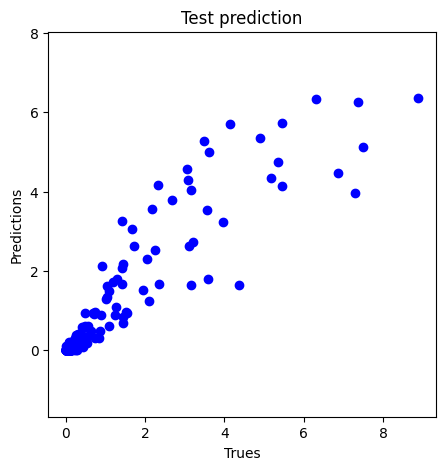

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画
plt.gca().set_aspect('equal', adjustable='datalim')

plt.show()

In [44]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [45]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

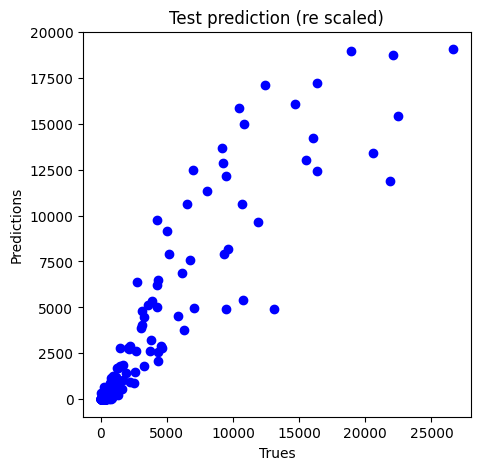

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [47]:
tst_preds.shape

(234, 1)

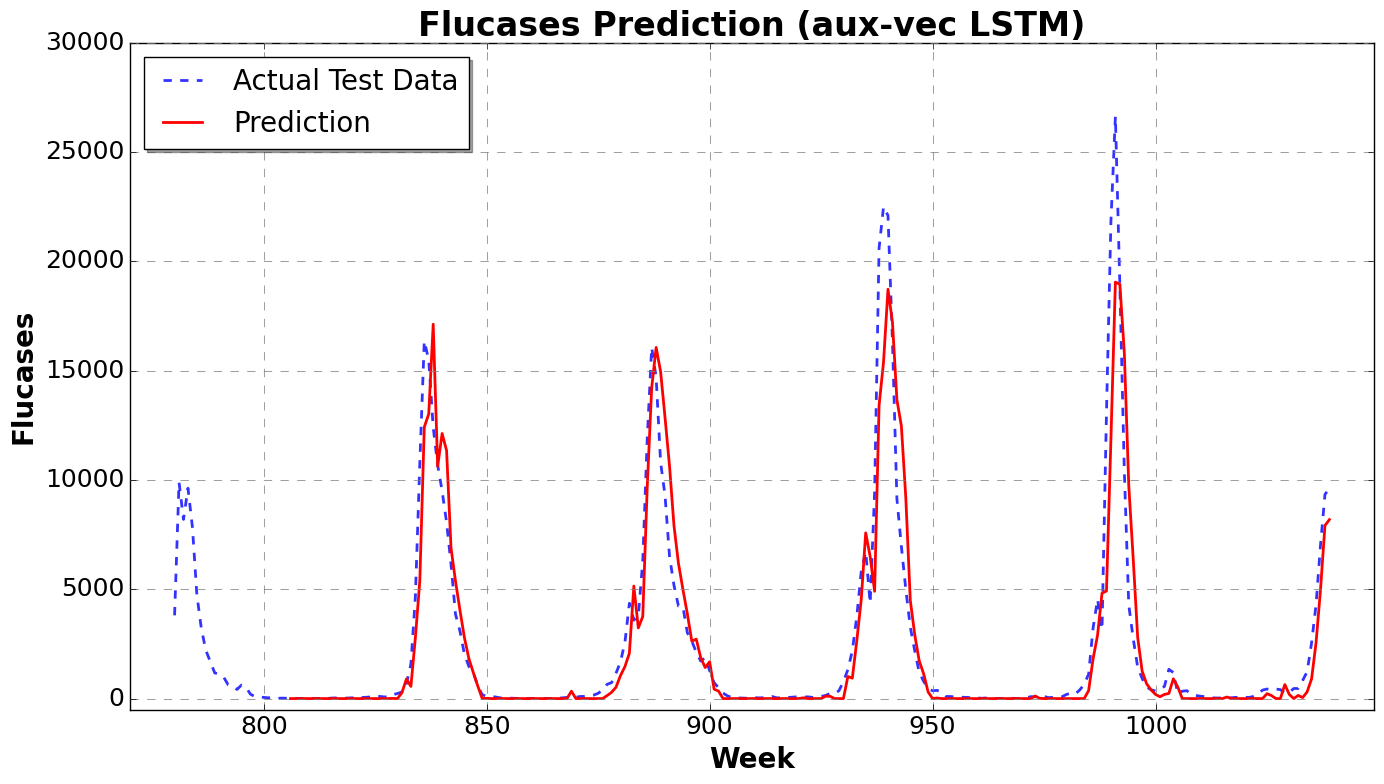

In [48]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Flucases Prediction (aux-vec LSTM)", fontsize=24, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
#plt.savefig("Flucases Prediction (aux-vec LSTM).jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [49]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [50]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 3119600.3241443015.
RMSE : 1766.2390336939961.
MAE : 805.2206400296627.
R2 : 0.8586789528886265.
pearson : 0.9271575403436185 6.891014843423988e-101


In [51]:
reg_metric(test_np[seq_length*2:,0], tst_preds[seq_length:,0], "Flucases")

Flucases
MSE : 3508939.2778258594.
RMSE : 1873.216292323409.
MAE : 900.2146374353996.
R2 : 0.8544810771294792.
pearson : 0.9249379521333854 1.7427724583565722e-88
